----
**Carga de librerías**

In [1]:
import time
start_time = time.time()

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import sklearn
%load_ext cudf.pandas
# pandas API is now GPU accelerated

import pandas as pd

In [3]:
#Cargamos los datos
! pip install openpyxl
data = pd.read_excel('data/bosch_aic_datathon.xlsx')

In [4]:
# Exploramos los tipos de datos
type(data)

pandas.core.frame.DataFrame

In [5]:
#hacemos una copia de los datos
data_sucia=data

In [6]:
#Previsualizamos los datos
data_sucia.head()

,Posición,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Banda,Baja,ReglaPHT,Alta,Años,Meses,Antigüedad,Clave de sexo,Lugar de nacimiento,Nacionalidad,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,None,solter,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0


In [7]:
data_sucia.shape

(1403, 20)

In [8]:
data_sucia.info()
#Podemos ver que la mayoría de los datos son objetos 
#hay unos que son enteros, por lo que unos si será necesario cambiarlos 
#La columna de alta y baja son fechas de tiempo ese si corresponde

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Posición                                      1403 non-null   object        
 1   Area                                          1403 non-null   object        
 2   Á.liq.                                        1403 non-null   object        
 3   Grupo de personal                             1403 non-null   object        
 4   CODIGO POSTAL                                 1403 non-null   int64         
 5   Motivo de la RENUNCIA                         1403 non-null   object        
 6   Banda                                         1402 non-null   object        
 7   Baja                                          1403 non-null   datetime64[ns]
 8   ReglaPHT                                      1403 non-null   object

In [9]:
data_sucia.describe()

,CODIGO POSTAL,Años,Meses,Antigüedad,Edad del empleado,Hijos
count,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000
mean,32550.890948,4.192445,48.848373,1465.451176,30.941554,1.132573
std,1740.667827,4.650099,54.076010,1622.280304,9.734537,1.302182
min,3259.000000,0.000000,0.166667,5.000000,18.000000,0.000000
25%,32575.000000,1.000000,5.766667,173.000000,24.000000,0.000000
50%,32575.000000,3.000000,32.600000,978.000000,28.000000,1.000000
75%,32599.000000,6.000000,71.100000,2133.000000,36.000000,2.000000
max,75116.000000,29.000000,351.733333,10552.000000,67.000000,6.000000


In [10]:
data_sucia.columns

StringIndex(['Posición' 'Area' 'Á.liq.' 'Grupo de personal' 'CODIGO POSTAL'
 'Motivo de la RENUNCIA' 'Banda' 'Baja' 'ReglaPHT' 'Alta' 'Años' 'Meses'
 'Antigüedad' 'Clave de sexo' 'Lugar de nacimiento' 'Nacionalidad'
 'Edad del empleado' '¿Cuanto tiempo tiene viviendo en Cd. Juarez?'
 'Estado Civil' 'Hijos'], dtype='object')

In [11]:
columns = [
    'Posición', 'Area', 'Á.liq.', 'Grupo de personal', 'CODIGO POSTAL',
    'Motivo de la RENUNCIA', 'Banda', 'Baja', 'ReglaPHT', 'Alta',
    'Años', 'Meses', 'Antigüedad', 'Clave de sexo', 'Lugar de nacimiento',
    'Nacionalidad', 'Edad del empleado', '¿Cuanto tiempo tiene viviendo en Cd. Juarez?',
    'Estado Civil', 'Hijos'
]

for column in columns:
    print(column, data_sucia[column].isna().sum())

# Dejando de lado la columna de vivir en juarez, tenemos un total de 13 NA's
# Podemos eliminar las filas de la columna de BANDA y la de LUGAR DE NACIMIENTO
# La columna de ESTADO CIVIL la podemos cambiar a soltero
# En cambio, la columna de juarez podemos cambiar todos esos NA's por "no he vivido en CD.JUAREZ"

Posición 0
Area 0
Á.liq. 0
Grupo de personal 0
CODIGO POSTAL 0
Motivo de la RENUNCIA 0
Banda 1
Baja 0
ReglaPHT 0
Alta 0
Años 0
Meses 0
Antigüedad 0
Clave de sexo 0


Lugar de nacimiento 2
Nacionalidad 0
Edad del empleado 0
¿Cuanto tiempo tiene viviendo en Cd. Juarez? 786
Estado Civil 10
Hijos 0


# One-hot para Clave de sexo

In [12]:
#Usamos One-hot para cambiar la columna del sexo
data_sucia = pd.get_dummies(data_sucia,columns=['Clave de sexo'],dtype=int)

# Agrupación para la columna de cuanto tiempo viviendo en Cd. Juarez

In [13]:
#Esta tecnica tambien se puede usar para la columna de cuantos años has vivido en juarez, pero primero
#hay que cambiar los NA's por 0, porque si es NA's es porque no ha vivido en Juarez
#Primero cambiamos los NA's por 0
data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'].fillna('Never', inplace=True)
data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'].unique()

#Para poder limpiar lo de los años voy a agruparlos en una cantidad fija, ya que hay valores como 2 y esa clase de valores
#puede ir contenidos en 1-3, esto se ve en la celda anterior
def categorize_years(value):
    if value in ['91-180 Days', '61-90 Days']:
        return '1 - Years'
    elif value in ['1-2 Years', '2-3 Years','1-2 Years ']:
        return '1 - 3 Years'
    elif value in ['3-4 Years', '4-5 Years',4,5]:
        return '3 - 5 Years'
    elif value in ['5-6 Years', '6-7 Years', '6 Years',7]:
        return '5 - 7 Years'
    elif value in ['7-8 Years', '8-9 Years', '9-10 Years', '10 years', '10+ Years',10]:
        return '7 - 10 Years'
    elif value in ['26 years','25 years',21,19,16,25]:
        return '10 + Years'
    else: 
        return value

data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'] = data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'].apply(categorize_years)



# Quitams los '-' y '/' de Motivo de la RENUNCIA

In [14]:
data_sucia['Motivo de la RENUNCIA'].replace(to_replace='[-/]', value=' ', regex=True)

0                       Vol Otro empleo
1                       Vol Otro empleo
2                       Vol Otro empleo
3                          Vol Estudios
4               Vol Cambio de domicilio
                     ...               
1398     Vol Transferencia entre planta
1399            Vol Cambio de domicilio
1400      Vol No regreso   no dio razón
1401      Imp.Tra Ausentismos continuos
1402    Imp.Tra LFT y o Reglamento Int.
Name: Motivo de la RENUNCIA, Length: 1403, dtype: object

# Limpieza de Columna de Estado Civil

In [15]:
#Ahora tenemos que cambiar el los NA's de estado civil por soltero, esto no se si sea lo correcto, pero
#a lo mejor le da pena decir que es soltero no se 
data_sucia['Estado Civil'].fillna('solter', inplace=True)
data_sucia['Estado Civil'].unique()


def categorize_civil(value):
    if value in ['solter','Solter','viud.']:
        return 'Solter'
    elif value in ['casad.','Casad.','Concu.','U.Libr']:
        return 'Casad'
    elif value in ['Divorc','Sep.','divorc']:
        return 'Separ'
    else:
        return value

data_sucia['Estado Civil'] = data_sucia['Estado Civil'].apply(categorize_civil)

# Limpieza de la columna de Lugar de Nacimiento

In [48]:
# Limpia los datos de la columna Lugar de nacimiento a el nombre del estado de nacimiento. 
# Limpia los datos de la columna Lugar de nacimiento a el nombre del estado de nacimiento. 
# Diccionario de reemplazos
reemplazos = {
    'Chihuahua': ['AZTECA CIUDAD JUAREZ', 'CAMARGO', 'CD JUAREZ', 'CD JUAREZ CHIH', 'CD. JUAREZ'],
    'Durango': ['CD. GOMEZ PALACIO', 'GENERAL SIMON BOLIVAR', 'GOMEZ PALACIO', 'LERDO', 'DURANGO', 'PEÑON BLANCO', 'POBLADO EL LUCERO', 'SAN DIMAS', 'TLAHUALILO DE ZARAGOZA'],
    'Aguascalientes': ['AGUASCALIENTES'],
    'Sinaloa': ['AHOME', 'CULIACAN'],
    'Veracruz': ['ANGEL R CABADA', 'COATZACOALCOS', 'CORDOBA', 'CORDOVA', 'COSAMALOAPAN', 'LAS MERCEDES', 'MARTINEZ DE LA TORRE', 'MINATITLAN', 'MOLOACAN', 'RAYA CARACOL', 'SAN ANDRES TUXTLA', 'TRES VALLES', 'VERACRUZ'],
    # Agrega el resto de tus reemplazos aquí
}

# Invertir el diccionario para mapear cada ciudad a su estado correspondiente
reemplazos_invertidos = {ciudad: estado for estado, ciudades in reemplazos.items() for ciudad in ciudades}

# Realizar los reemplazos
data_sucia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(reemplazos_invertidos)

# Ver resultados de los reemplazos usando aleatoriedad
data_sucia['Lugar de nacimiento'].sample(10)

102        JUAREZ
1200       JUAREZ
531        JUAREZ
870      Veracruz
1047       JUAREZ
501     CHIHUAHUA
1267      Durango
387     Chihuahua
426        JUAREZ
1216       VIESCA
Name: Lugar de nacimiento, dtype: object

In [17]:
# Diccionario para la nueva celda de reemplazos
reemplazos_nueva_celda = {
    'PUEBLA': ['GUADALUPE ANALCO', 'PUEBLA'],
    'OAXACA': ['IXHUATAN', 'OAXACA', 'PASO DEL JOBO', 'SAN FRANCISCO DEL MAR', 'SAN JUAN BAUTISTA TUXTEPE', 'SAN LUCAS OJITLAN', 'TUXTEPEC'],
    'TAMAULIPAS': ['MATAMOROS']
}

# Invertir el diccionario para mapear cada ciudad a su estado correspondiente
reemplazos_invertidos_nueva_celda = {ciudad: estado for estado, ciudades in reemplazos_nueva_celda.items() for ciudad in ciudades}

# Realizar los reemplazos
data_sucia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(reemplazos_invertidos_nueva_celda)


# Ahora que ya tenemos la limpieza lista podemos eliminar todos los valores donde hay NA

In [18]:
data_sucia = data_sucia.dropna()

# Comparaciones del tamaño de los dataset

In [56]:
# Ver las columnas
data_sucia.sample(10)

,Posición,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Banda,Baja,ReglaPHT,Alta,...,Meses,Antigüedad,Lugar de nacimiento,Nacionalidad,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos,Clave de sexo_Femenino,Clave de sexo_Masculino
1285,POS538,VS9-ABS,S5,Direct,32575,VOL-NO REGRESO / NO DIO RAZÓN,DO,2022-11-18,JT031800,2022-09-01,...,2.600000,78,CIUDAD JUAREZ,Mexican,23,Never,Casad,1,1,0
962,POS1921,MFS,S5,Direct,32575,IMP.TRA-AUSENTISMOS CONTINUOS,DO,2022-06-16,JS011500,2019-11-07,...,31.733333,952,JUAREZ,Mexican,20,Never,Solter,0,0,1
1160,POS1323,VS9-ABS,S5,Direct,32500,IMP.TRA-AUSENTISMOS CONTINUOS,DO,2022-09-20,JS011500,2020-12-29,...,21.000000,630,Durango,Mexican,44,7 - 10 Years,Solter,3,1,0
207,POS2939,VS5,S5,Direct,32590,VOL-ESTUDIOS,DO,2023-04-11,JS011500,2023-01-12,...,2.966667,89,CIUDAD JUAREZ,Mexican,21,7 - 10 Years,Solter,0,1,0
1276,POS1376,VS7,S5,Direct,32590,VOL-TRANSFERENCIA ENTRE PLANTA,DNO,2022-11-11,ADMINIST,2013-10-30,...,109.966667,3299,Durango,Mexican,34,Never,Casad,1,0,1
1235,POS2939,VS9-ABS,S5,Direct,32690,VOL-NO REGRESO / NO DIO RAZÓN,DO,2022-10-27,JT012324,2022-10-11,...,0.533333,16,CAMPECHE,Mexican,34,7 - 10 Years,Separ,3,0,1
397,POS2939,VS7,S5,Direct,32590,VOL-NO REGRESO / NO DIO RAZÓN,DO,2023-07-05,JT012324,2023-05-25,...,1.366667,41,CHIHUAHUA,Mexican,31,7 - 10 Years,Solter,1,1,0
655,POS1559,MFS,S5,Direct,32110,VOL-OTRO EMPLEO,DNO,2022-01-25,JS011500,2016-07-27,...,66.933333,2008,JUAREZ,Mexican,24,7 - 10 Years,Solter,0,0,1
833,POS1230,VS7,S5,Direct,32599,VOL-OTRO EMPLEO,DNO,2022-04-26,JF010600,2015-03-18,...,86.533333,2596,OAXACA,Mexican,28,Never,Casad,0,0,1
818,POS538,VS9-ABS,S5,Direct,32575,VOL-NO REGRESO / NO DIO RAZÓN,DO,2022-04-20,JT031800,2019-07-25,...,33.333333,1000,TABASCO,Mexican,40,Never,Casad,3,1,0


In [20]:
# Este comando cambiar el tipo de columnas, no se exactamente cuales y a que tipo por lo que dejo así el borrador
#data_limpia["nombre_columna"] = data_sucia["nombre_columna"].astype(int)

## Gráfica cantidad de Hijos

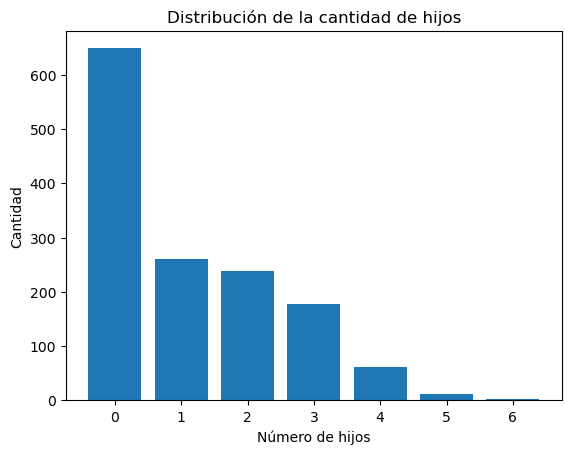

In [21]:
#Graficas de la cantidad de hijos
num_hijos = data_sucia['Hijos'].value_counts()
num_hijos = num_hijos.sort_index()
plt.bar(num_hijos.index,num_hijos.values)
plt.xlabel("Número de hijos")
plt.ylabel("Cantidad")
plt.title("Distribución de la cantidad de hijos")
plt.xticks(num_hijos.index)
plt.show()

## Gráfica Estado Civil

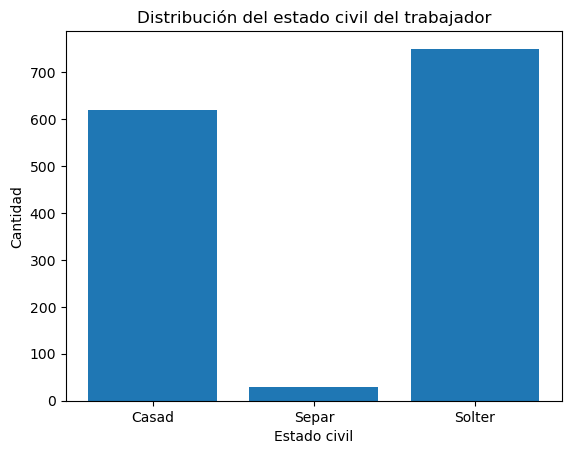

In [22]:
#Graficas del estado civil del trabajador
num_est_civil = data_sucia['Estado Civil'].value_counts()
num_est_civil = num_est_civil.sort_index()
plt.bar(num_est_civil.index,num_est_civil.values)
plt.xlabel("Estado civil")
plt.ylabel("Cantidad")
plt.title("Distribución del estado civil del trabajador")
plt.show()

# Gráfica Motivo de RENUNCIA

In [23]:
data_sucia['Motivo de la RENUNCIA'].value_counts()

Vol-Otro empleo                     308
Vol-Transferencia entre planta      235
Vol-No regreso / no dio razón       218
Vol-Prob personales y/o fam.        197
Vol-Insatisfacción personal          94
Vol-Cambio de domicilio              89
Imp.Tra-Ausentismos continuos        71
Vol-Estudios                         68
Imp.Tra-Jubilación                   32
Vol-Razones médicas                  28
Imp.Tra-LFT y/o Reglamento Int.      12
Imp.Tra-LFT y/o Reglamento int       12
Imp.Pat-Pensionado IMSS               8
Imp.Pat-Terminación del Contrato      6
Imp.Tra-Bajo desempeño                3
Muerte Natural                        3
Vol-Maternidad                        3
Imp.Pat-Terminación del contra        2
Imp.Tra-Falsificación de docto        2
Imp.Tra-Falsificación de doctos.      2
Muerte Accidental                     2
Imp.Pat-Varios Jubilado               1
Imp.Tra-Uso de drogas y/o bebi        1
Vol-Ambiente de trabajo               1
Vol-Matrimonio                        1


# Renuncia (Guillermo)

Target = VOL = RENUNCIA
- Otro empleo
- Estudios
- NO regreso
- ...
- ...

In [26]:
# Convertir todo a mayúsculas para mantener la consistencia
data_sucia['Motivo de la RENUNCIA'] = data_sucia['Motivo de la RENUNCIA'].str.upper()

# Eliminar espacios al principio y al final
data_sucia['Motivo de la RENUNCIA'] = data_sucia['Motivo de la RENUNCIA'].str.strip()

# Unificar categorías que son esencialmente las mismas
reemplazos_motivos = {
    'IMP.TRA-LFT Y/O REGLAMENTO INT.': 'IMP.TRA-LFT Y/O REGLAMENTO INTERNO',
    'IMP.TRA-LFT Y/O REGLAMENTO INT': 'IMP.TRA-LFT Y/O REGLAMENTO INTERNO',
    'IMP.PAT-TERMINACIÓN DEL CONTRATO': 'IMP.PAT-TERMINACIÓN DEL CONTRATO',
    'IMP.PAT-TERMINACIÓN DEL CONTRA': 'IMP.PAT-TERMINACIÓN DEL CONTRATO',
    'IMP.TRA-FALSIFICACIÓN DE DOCTOS.': 'IMP.TRA-FALSIFICACIÓN DE DOCUMENTOS',
    'IMP.TRA-FALSIFICACIÓN DE DOCTO': 'IMP.TRA-FALSIFICACIÓN DE DOCUMENTOS'
    # Agrega aquí cualquier otro reemplazo necesario
}

data_sucia['Motivo de la RENUNCIA'] = data_sucia['Motivo de la RENUNCIA'].replace(reemplazos_motivos)

# Contar de nuevo los valores
data_sucia['Motivo de la RENUNCIA'].value_counts()

data_sucia["Motivo de la RENUNCIA"].value_counts()


VOL-OTRO EMPLEO                        308
VOL-TRANSFERENCIA ENTRE PLANTA         235
VOL-NO REGRESO / NO DIO RAZÓN          218
VOL-PROB PERSONALES Y/O FAM.           197
VOL-INSATISFACCIÓN PERSONAL             94
VOL-CAMBIO DE DOMICILIO                 89
IMP.TRA-AUSENTISMOS CONTINUOS           71
VOL-ESTUDIOS                            68
IMP.TRA-JUBILACIÓN                      32
VOL-RAZONES MÉDICAS                     28
IMP.TRA-LFT Y/O REGLAMENTO INTERNO      24
IMP.PAT-PENSIONADO IMSS                  8
IMP.PAT-TERMINACIÓN DEL CONTRATO         8
IMP.TRA-FALSIFICACIÓN DE DOCUMENTOS      4
IMP.TRA-BAJO DESEMPEÑO                   3
MUERTE NATURAL                           3
VOL-MATERNIDAD                           3
MUERTE ACCIDENTAL                        2
IMP.PAT-VARIOS JUBILADO                  1
IMP.TRA-USO DE DROGAS Y/O BEBI           1
VOL-AMBIENTE DE TRABAJO                  1
VOL-MATRIMONIO                           1
VOL-PROBLEMAS CON TRANSPORTE             1
Name: Motiv

In [32]:
data_sucia["CODIGO POSTAL"].info()

<class 'pandas.core.series.Series'>
Int64Index: 1400 entries, 0 to 1402
Series name: CODIGO POSTAL
Non-Null Count  Dtype
--------------  -----
1400 non-null   int64
dtypes: int64(1)
memory usage: 21.9 KB


In [33]:
data_sucia["CODIGO POSTAL"].unique()

array([32520, 32217, 32600, 32575, 32674, 32690, 32576, 32540, 32584,
       32599, 32433, 32696, 32570, 32598, 32150, 32665, 32695, 32410,
       32587, 32697, 32594, 32543, 32583, 32160, 32545, 32100, 32546,
       32563, 32667, 32580, 32240, 32618, 32590, 32573, 32424, 32675,
       32380, 32350, 32500, 32200, 32472, 32668, 32660, 32585, 32553,
        3720, 32664, 32107, 32574, 32654, 32699, 32551, 32510, 32422,
       32659, 32389, 32340, 32698, 32471, 32130, 27000, 32548, 32560,
       32400, 32550, 32469, 32215, 32720, 32310, 32586, 32190, 32552,
       32539, 50180, 32676, 32250, 32617, 32448, 32425, 32610, 32170,
       32110, 32680, 32220, 32230, 32606, 32536, 45086, 32912, 32742,
       32616, 32722, 32210, 32360, 32687, 32140, 32379, 32330, 32702,
       32538, 32670, 32740, 32264, 32577, 75116, 32662, 32320, 32650,
       32300, 32605, 23575, 32450, 32652, 32050, 32647, 32280, 32403,
        3259, 32180, 32750, 32408, 32060, 32423, 32159, 32677])

In [34]:
data_sucia[data_sucia["CODIGO POSTAL"] == 3720] # Corresponde 

,Posición,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Banda,Baja,ReglaPHT,Alta,...,Meses,Antigüedad,Lugar de nacimiento,Nacionalidad,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos,Clave de sexo_Femenino,Clave de sexo_Masculino
209,POS538,VS1,S5,Direct,3720,VOL-NO REGRESO / NO DIO RAZÓN,DO,2023-04-11,JT031800,2023-02-02,...,2.266667,68,CIUDAD JUAREZ,Mexican,24,Never,Casad,1,1,0


## Comentario: 

Para el punto 4 del desafío, proponogo plotear una gráfica (podrían ser dos) que relacione el código póstal (podría ser ubicación actual) con el motivo de RENUNCIA Vol-Insatisfacción personal

----
** Area de Victor para creacion de base de datos **

In [30]:
# Importar libreria para trabajar con mysql
#! pip install mysql-connector-python
import mysql.connector



# Hacer un mapeo de los datos necesarios para conectarse
config = {
    'user': 'datathonequipo5',
    'password': 'CodedSpiritDev05',
    'host': 'datathon.mysql.database.azure.com',
    'database': 'datathon'
}

# Conectarse a la base de datos
cnx = mysql.connector.connect(**config)

# Verificar la conexión
cnx.is_connected()



True

In [31]:
total_time = time.time() - start_time
print(f"Tiempo total de ejecución: {total_time} segundos")

Tiempo total de ejecución: 6.462537527084351 segundos
